# POSTTEST 8

Dimas sasongko_2009106093

## Horse 2 Dataset Deep_Learning

# Import Package -------------------------------------------------------------------------

In [310]:
import pandas as pd
import tensorflow as tf

#Data Cleaning#
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [311]:
df = pd.read_csv("horses 2.csv")
df

C:\Users\TUF\AppData\Local\Temp\ipykernel_1836\3437927693.py:1: DtypeWarning: Columns (25,26,32,33,38,51,52,53,54,56,57,58,59,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("horses 2.csv")


,previous_margin,position,position_again,position_two,margin,bf_odds,bf_odds_two_mins_out,bf_odds_all,vic_tote,vic_tote_two_mins_out,...,class_stronger_places,first_up_starts,first_up_wins,first_up_places,second_up_starts,second_up_wins,second_up_places,track_distance_starts,track_distance_wins,track_distance_places
0,6.8,1,1.0,1.0,0.0,2.88,3.00,"{3.25,3.05,3.0,2.92,2.88}",2.3,3.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.8,0,2.0,2.0,NaN,15.00,18.00,"{18.5,11.0,18.0,17.5,15.0}",11.2,11.7,...,0.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0,3.0,3.0,NaN,95.00,100.00,"{60.0,90.0,100.0,140.0,95.0}",46.4,37.1,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,4.0,0,NaN,4.0,NaN,20.00,17.00,"{18.0,15.5,17.0,20.0,20.0}",13.2,14.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,NaN,5.0,NaN,2.74,2.68,"{2.66,2.72,2.68,2.86,2.74}",2.6,3.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241193,NaN,0,NaN,NaN,NaN,3.80,3.85,"{3.85,3.8,3.85,3.85,3.85,3.8}",3.7,3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241194,NaN,0,NaN,NaN,NaN,170.00,120.00,"{120.0,160.0,140.0,120.0,110.0,170.0}",68.8,67.3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
241195,NaN,0,NaN,NaN,NaN,3.85,4.00,"{3.85,3.85,3.8,4.0,4.0,3.85}",5.2,5.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
241196,NaN,0,NaN,NaN,NaN,38.00,40.00,"{32.0,42.0,36.0,40.0,32.0,38.0}",22.0,21.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241198 entries, 0 to 241197
Columns: 108 entries, previous_margin to track_distance_places
dtypes: bool(10), float64(69), int64(5), object(24)
memory usage: 182.6+ MB


In [313]:
df.describe()

,previous_margin,position,position_again,position_two,margin,bf_odds,bf_odds_two_mins_out,vic_tote,vic_tote_two_mins_out,nsw_tote,...,class_stronger_places,first_up_starts,first_up_wins,first_up_places,second_up_starts,second_up_wins,second_up_places,track_distance_starts,track_distance_wins,track_distance_places
count,145290.000000,241198.000000,68984.000000,234513.000000,171092.000000,241198.000000,240997.000000,241198.000000,240997.000000,241198.000000,...,213803.000000,214148.000000,214148.000000,214148.000000,214076.000000,214076.000000,214076.000000,213649.000000,213649.000000,213649.000000
mean,4.820105,0.100656,1.945683,5.690981,4.962783,37.044911,31.173106,18.361101,16.966572,18.567087,...,0.802622,3.319611,0.382320,0.740693,2.798684,0.339865,0.667305,1.221115,0.200769,0.348862
std,5.545815,0.300873,0.806069,3.316466,5.720454,62.953861,47.954050,19.671723,17.296365,19.930597,...,1.928756,2.146200,0.671096,0.933681,2.091626,0.613947,0.880804,2.614447,0.617769,0.941683
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.050000,1.060000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.200000,0.000000,1.000000,3.000000,1.300000,7.000000,6.800000,6.300000,6.400000,6.200000,...,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,0.000000,2.000000,5.000000,3.700000,14.500000,14.000000,11.400000,11.100000,11.500000,...,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.700000,0.000000,3.000000,8.000000,6.900000,36.000000,32.000000,22.400000,20.700000,23.000000,...,1.000000,5.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,99.900000,1.000000,5.000000,23.000000,99.900000,1000.000000,1000.000000,336.100000,301.800000,286.000000,...,28.000000,16.000000,10.000000,8.000000,15.000000,9.000000,7.000000,66.000000,15.000000,23.000000


In [314]:
df.isna().sum()

previous_margin           95908
position                      0
position_again           172214
position_two               6685
margin                    70106
                          ...  
second_up_wins            27122
second_up_places          27122
track_distance_starts     27549
track_distance_wins       27549
track_distance_places     27549
Length: 108, dtype: int64

In [315]:
print(f'panjang dataset {len(df)} Row')

panjang dataset 241198 Row


# Data Cleaning -------------------------------------------------------------------------
Data Dibersihkan Untuk dapat melakukan Deep Learning dengan lancar

### Mean --

In [316]:
dataset_mn = df.copy()
imputer_mean = SimpleImputer(strategy='mean')

In [317]:
df.isna().sum()

previous_margin           95908
position                      0
position_again           172214
position_two               6685
margin                    70106
                          ...  
second_up_wins            27122
second_up_places          27122
track_distance_starts     27549
track_distance_wins       27549
track_distance_places     27549
Length: 108, dtype: int64

In [318]:
imputer_mean = SimpleImputer(strategy="mean")

In [319]:
dataset_mn.dropna(inplace=True)
dataset_mn.isna().sum()

previous_margin          0
position                 0
position_again           0
position_two             0
margin                   0
                        ..
second_up_wins           0
second_up_places         0
track_distance_starts    0
track_distance_wins      0
track_distance_places    0
Length: 108, dtype: int64

In [320]:
dataset_mn.dropna(inplace=True)
dataset_mn.isna().sum()

previous_margin          0
position                 0
position_again           0
position_two             0
margin                   0
                        ..
second_up_wins           0
second_up_places         0
track_distance_starts    0
track_distance_wins      0
track_distance_places    0
Length: 108, dtype: int64

### Data Duplikat --

In [321]:
dataset_mn.duplicated().sum()

0

In [322]:
dataset_mn.drop_duplicates(inplace=True)
dataset_mn.duplicated().sum()

0

In [323]:
dataset_mn

,previous_margin,position,position_again,position_two,margin,bf_odds,bf_odds_two_mins_out,bf_odds_all,vic_tote,vic_tote_two_mins_out,...,class_stronger_places,first_up_starts,first_up_wins,first_up_places,second_up_starts,second_up_wins,second_up_places,track_distance_starts,track_distance_wins,track_distance_places
0,6.8,1,1.0,1.0,0.0,2.88,3.00,"{3.25,3.05,3.0,2.92,2.88}",2.3,3.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11,3.6,1,1.0,1.0,0.0,11.00,9.60,"{9.0,9.2,9.6,10.0,11.0}",10.5,9.9,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0
65,0.4,1,1.0,1.0,0.0,5.00,4.10,"{4.6,4.5,4.5,4.6,4.7,4.7,5.1,4.1,4.8,5.0}",4.4,5.4,...,2.0,7.0,0.0,2.0,6.0,0.0,1.0,2.0,2.0,0.0
73,3.5,1,1.0,1.0,0.0,8.80,7.80,"{5.4,5.4,6.2,8.0,8.4,8.0,8.0,7.8,8.6,8.8}",8.3,5.9,...,2.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0
116,3.8,1,1.0,1.0,0.0,3.70,3.75,"{3.4,3.4,3.4,3.45,3.5,3.7,3.7,3.75,3.7,3.7}",2.8,3.8,...,3.0,7.0,1.0,3.0,7.0,3.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237845,3.4,0,2.0,2.0,1.3,4.60,4.30,"{3.25,3.15,3.3,3.5,3.35,3.5,3.9,4.3,4.4,4.6}",4.7,4.6,...,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
237846,4.6,0,3.0,3.0,1.5,23.00,26.00,"{27.0,27.0,27.0,26.0,27.0,30.0,28.0,26.0,24.0,...",17.9,16.6,...,0.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
237857,6.2,0,3.0,3.0,3.8,20.00,21.00,"{23.0,24.0,28.0,30.0,29.0,30.0,25.0,21.0,21.0,...",19.5,18.1,...,0.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
237879,0.0,1,1.0,1.0,0.0,24.00,21.00,"{19.5,19.5,19.5,19.5,19.0,20.0,21.0,21.0,20.0,...",16.7,16.3,...,0.0,10.0,3.0,2.0,9.0,1.0,4.0,0.0,0.0,0.0


# Deep Learning -------------------------------------------------------------------------

In [324]:
X = dataset_mn[['position_again', 'position_two','margin', 'bf_odds' ]]
Y = dataset_mn[['position']]

In [325]:
dataset_mn.dtypes

previous_margin          float64
position                   int64
position_again           float64
position_two             float64
margin                   float64
                          ...   
second_up_wins           float64
second_up_places         float64
track_distance_starts    float64
track_distance_wins      float64
track_distance_places    float64
Length: 108, dtype: object

### dataset di bagi menjadi training set dan testing set dengan proporsi 70:30 --

In [326]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=.3)

In [327]:
# melihat dimensi dari x_train
x_train.shape

(20206, 4)

In [328]:
# melihat dimensi dari x_test
x_test.shape

(8660, 4)

In [329]:
np.unique(y_test)

array([0, 1], dtype=int64)

### Encoding label - label dengan one-hot encoding menggunakan keras.utils --

In [330]:
num_class = 2
y_train = tf.keras.utils.to_categorical(y_train, num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_class)

In [331]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="relu", input_dim=4),
    tf.keras.layers.Dense(num_class, activation="softmax")
])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [332]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

### Trining model Menggunakan epoch=30 --

In [333]:
history = model.fit(
    x = x_train, y = y_train, 
    validation_data=(x_test, y_test),
    verbose=2,
    epochs=30,
    steps_per_epoch=30
)

Epoch 1/30
30/30 - 1s - loss: 0.7293 - accuracy: 0.5148 - val_loss: 0.7117 - val_accuracy: 0.5314 - 621ms/epoch - 21ms/step
Epoch 2/30
30/30 - 0s - loss: 0.7037 - accuracy: 0.5350 - val_loss: 0.6959 - val_accuracy: 0.5476 - 293ms/epoch - 10ms/step
Epoch 3/30
30/30 - 0s - loss: 0.6928 - accuracy: 0.5506 - val_loss: 0.6890 - val_accuracy: 0.5592 - 284ms/epoch - 9ms/step
Epoch 4/30
30/30 - 0s - loss: 0.6879 - accuracy: 0.5604 - val_loss: 0.6858 - val_accuracy: 0.5669 - 247ms/epoch - 8ms/step
Epoch 5/30
30/30 - 0s - loss: 0.6855 - accuracy: 0.5661 - val_loss: 0.6841 - val_accuracy: 0.5714 - 316ms/epoch - 11ms/step
Epoch 6/30
30/30 - 0s - loss: 0.6843 - accuracy: 0.5696 - val_loss: 0.6832 - val_accuracy: 0.5733 - 301ms/epoch - 10ms/step
Epoch 7/30
30/30 - 0s - loss: 0.6836 - accuracy: 0.5713 - val_loss: 0.6827 - val_accuracy: 0.5744 - 293ms/epoch - 10ms/step
Epoch 8/30
30/30 - 0s - loss: 0.6832 - accuracy: 0.5722 - val_loss: 0.6824 - val_accuracy: 0.5747 - 304ms/epoch - 10ms/step
Epoch 9/30

### melihat akurasi data dengan menggunakan data testing --

In [334]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Tes Loss:', score[0])
print('Tes Akurasi:', score[1])

Tes Loss: 0.6815106868743896
Tes Akurasi: 0.5758660435676575


### visualisasi hasil Akurasi dari data training dan data validasi --

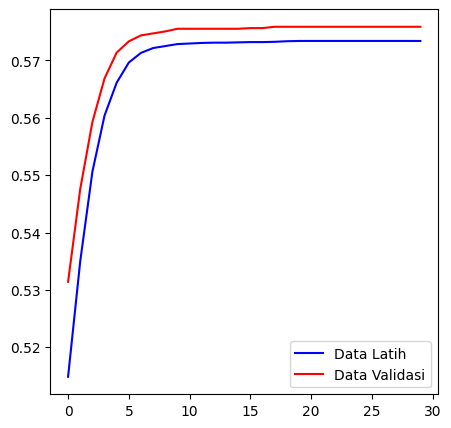

In [335]:
plt.figure(1, figsize=(5,5))
plt.plot(range(len(history.history['accuracy'])),
         history.history['accuracy'],
         color='b',
         label='Data Latih')

plt.plot(range(len(history.history['val_accuracy'])),
         history.history['val_accuracy'],
         color='r',
         label='Data Validasi', )

plt.legend()
plt.show()

# ----------------------------------------------END--------------------------------------------------------